# Pymaceuticals Inc.
---

### Analysis

- The correlation coefficient suggests that the mouse weight and tumor size are strongly and positively correlated
- Capomulin and Ramicane appear to have reduced tumor size well, considering their mean and median tumor volume are both below the initial tumor volume (45 mm3)
- Ceftamin and Infubuterol performed poorly, having mean and median tumor size above the initial tumor size

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
# Assuming 'Mouse ID' is the common column
pym_combined = pd.merge(study_results, mouse_metadata, on='Mouse ID', how= 'left')
# Display the data table for preview
pym_combined

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
mouse_count = pym_combined["Mouse ID"].nunique()
mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = pym_combined.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
duplicate_mouse_ids = pym_combined.loc[duplicates, 'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
mouse_id_to_drop = 'g989'  # Replace 'ABC123' with the actual mouse ID you want to drop
clean_pym_combined = pym_combined.drop(pym_combined[pym_combined['Mouse ID'] == mouse_id_to_drop].index)

# Print the updated DataFrame
clean_pym_combined

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_count_clean = clean_pym_combined["Mouse ID"].nunique()
mouse_count_clean

248

## Summary Statistics

In [7]:
# Group the data by 'Drug Regimen'
grouped_regimen = clean_pym_combined.groupby('Drug Regimen')

# Calculate the summary statistics for each regimen
mean_tumor_vol = grouped_regimen['Tumor Volume (mm3)'].mean()
median_tumor_vol = grouped_regimen['Tumor Volume (mm3)'].median()
variance_tumor_vol = grouped_regimen['Tumor Volume (mm3)'].var()
std_dev_tumor_vol = grouped_regimen['Tumor Volume (mm3)'].std()
sem_tumor_vol = grouped_regimen['Tumor Volume (mm3)'].sem()

# Assemble the results into a single summary DataFrame
summary_statistics = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_vol,
    "Median Tumor Volume": median_tumor_vol,
    "Tumor Volume Variance": variance_tumor_vol,
    "Tumor Volume Std. Dev.": std_dev_tumor_vol,
    "Tumor Volume SEM": sem_tumor_vol
})

# Display the summary DataFrame
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_agg = clean_pym_combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_statistics_agg.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume SEM']
summary_statistics_agg

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

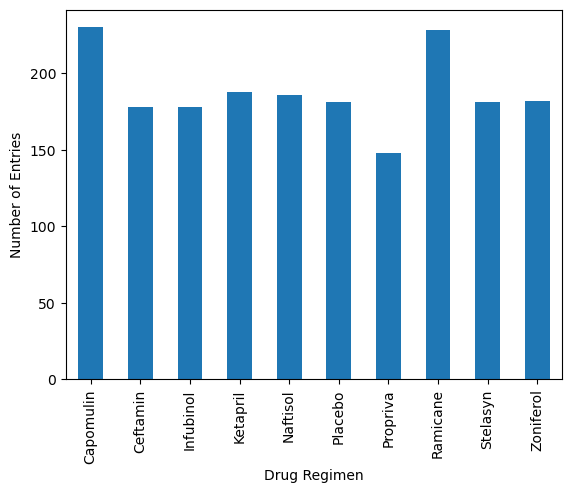

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Count the number of entries for each drug regimen
regimen_counts = clean_pym_combined.groupby('Drug Regimen').count()['Mouse ID']

# Generate a bar plot showing the total number of entries for each drug regimen
regimen_counts.plot(kind='bar')

# Adding labels to the plot
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Entries')

# Show the plot
plt.show()

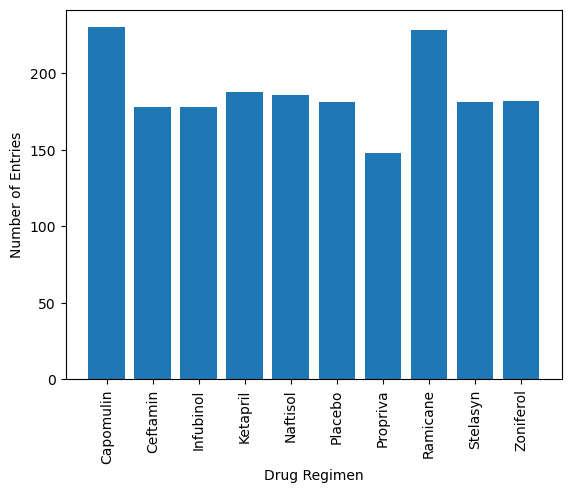

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Count the number of entries for each drug regimen
regimen_counts = clean_pym_combined.groupby('Drug Regimen').count()['Mouse ID']

# Get the names of the drug regimens for x-axis labels
regimen_names = regimen_counts.index.tolist()

# Generate the bar plot using pyplot
plt.bar(regimen_names, regimen_counts)

# Add labels and title to the plot
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Entries')
plt.xticks(rotation=90)

# Show the plot
plt.show()

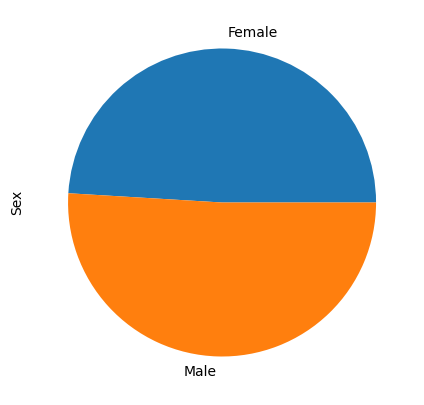

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts = clean_pym_combined.groupby('Sex').count()['Mouse ID']
sex_counts.plot.pie(y=sex_counts, figsize=(5, 5))
plt.ylabel("Sex")
plt.show()

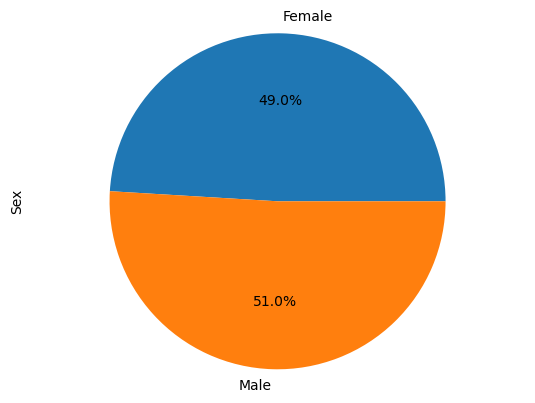

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = ["Female", "Male"]
plt.pie(sex_counts, labels=sex, autopct='%1.1f%%')
# Create axes which are equ')al so we have a perfect circle
plt.ylabel('Sex')
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
last_timepoint = clean_pym_combined.groupby('Mouse ID')['Timepoint'].max().reset_index()
# Start by getting the last (greatest) timepoint for each mouse
filtered_data = clean_pym_combined[clean_pym_combined['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, filtered_data, on=['Mouse ID', 'Timepoint'], how='left')
final_tumor_volume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2.0,Infubinol,Female,20.0,23.0
1,a251,45,65.525743,1.0,Infubinol,Female,21.0,25.0
2,a262,45,NaN,NaN,NaN,NaN,NaN,NaN
3,a275,45,62.999356,3.0,Ceftamin,Female,20.0,28.0
4,a366,30,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
243,z435,10,NaN,NaN,NaN,NaN,NaN,NaN
244,z578,45,30.638696,0.0,Ramicane,Male,11.0,16.0
245,z581,45,62.754451,3.0,Infubinol,Female,24.0,25.0
246,z795,45,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and check for potential outliers
for treatment in treatment_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_volume = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Add to the tumor volume data list
    tumor_vol_data.append(final_volume)
    
    # Calculate the IQR
    quartiles = final_volume.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = final_volume.loc[(final_volume < lower_bound) | (final_volume > upper_bound)]

    # Print the results
    print(f"{treatment}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


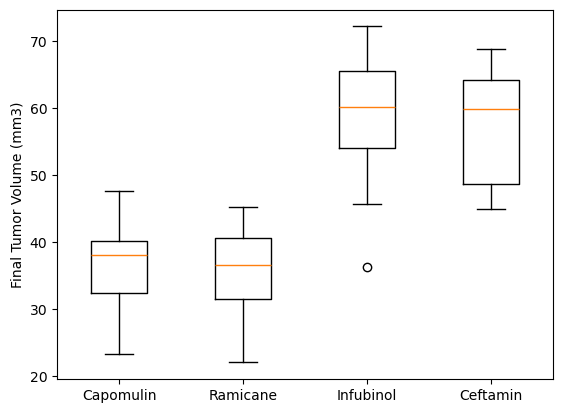

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatment_list)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

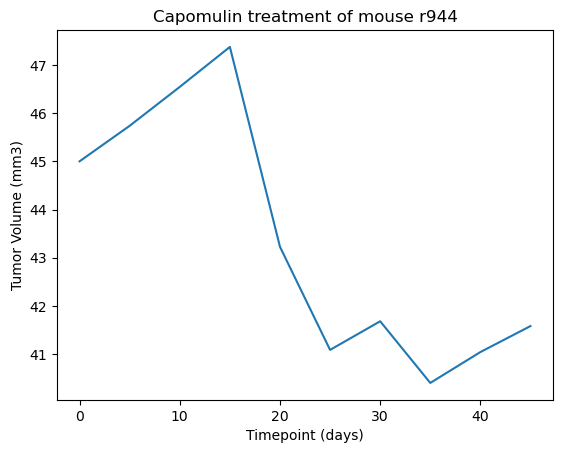

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'r944'
capomulin_data = clean_pym_combined[(clean_pym_combined['Drug Regimen'] == 'Capomulin') & (clean_pym_combined['Mouse ID'] == mouse_id)]
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'])
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel('Timepoint (days)')
plt.title(f'Capomulin treatment of mouse {mouse_id}')
plt.show()

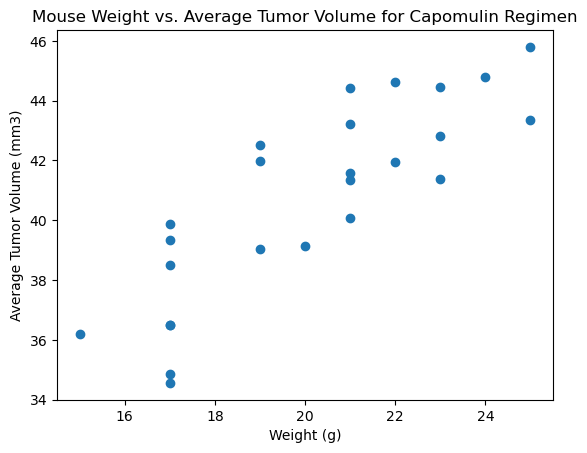

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the data for the Capomulin regimen
capomulin_data = clean_pym_combined[clean_pym_combined['Drug Regimen'] == 'Capomulin']

# Group by mouse ID and calculate average tumor volume and weight
grouped_capomulin = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean'})
merged_weight = pd.merge(grouped_capomulin, capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates(), on='Mouse ID')
# Generate the scatter plot
plt.scatter(merged_weight['Weight (g)'], merged_weight['Tumor Volume (mm3)'])


# Add labels and title to the plo
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')

# Show the plot
plt.show()


## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.84


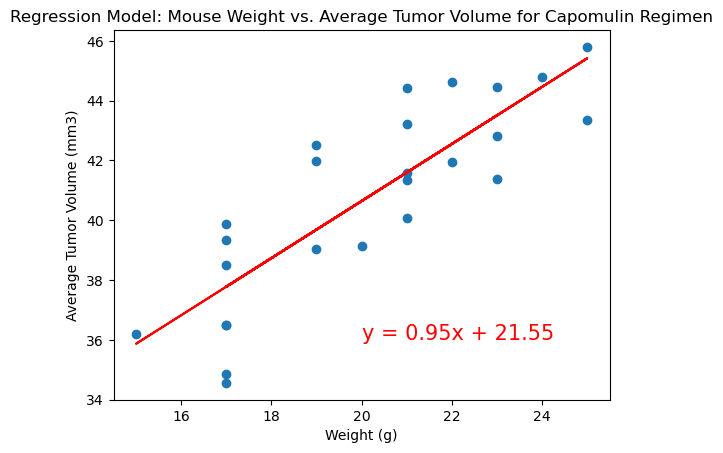

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(merged_weight['Weight (g)'], merged_weight['Tumor Volume (mm3)'])
print(f"The correlation coefficient between mouse weight and average tumor volume is {correlation[0]:.2f}")

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(merged_weight['Weight (g)'], merged_weight['Tumor Volume (mm3)'])

# Create equation of the line to calculate predicted tumor volume
regress_values = merged_weight['Weight (g)'] * slope + intercept

# Create a scatter plot
plt.scatter(merged_weight['Weight (g)'], merged_weight['Tumor Volume (mm3)'])

# Plot the linear model on top of scatter plot 
plt.plot(merged_weight['Weight (g)'], regress_values, "r-")

# Annotate linear regression equation
plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', (20, 36), fontsize=15, color="red")

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Regression Model: Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')

# Show plot
plt.show()